# Sentiment Analysis with Deep Learning

# Phase 1- Pre-Prosessing-EDA

This notebook consists the functions and code for loading, pre=processing and EDA for this project.  

### CHRISP-DM phases

Data Understanding and Data Preperation phases for CRISP-DM can be found in this noteboook.

#### 2.Data Understanding
Starts with an initial data collection and proceeds with activities in order to get familiar with the data, to identify data quality problems, to discover first insights into the data. 

#### 3.Data Preparation
The data preparation phase covers all activities to construct the final dataset from the initial raw data.

### Table of Contents

- 1.Import Libraries
- 2.Define Functions 
- 3.Load-Read-Extract
- 4.Pre-Processig
- 5.Tokenizing-Sequenzing-Padding
- 6.Exploratory Data Analysis (EDA)


## 1. Import Libraries

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import bz2
import re
import numpy as np
import string
from nltk.corpus import stopwords
stop = stopwords.words('english')
import nltk
from sklearn.preprocessing import LabelEncoder
np.random.seed(0)
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import text, sequence
import pickle
from nltk.stem import WordNetLemmatizer
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline
import nltk
#nltk.download('wordnet')

Using TensorFlow backend.


## 2. Functions 

In this part all functions are defined for loading, pre-processing-EDA

In [5]:
def read_txt_file (file):
    """Reads txt file into lines, 
    extracts labels from each line using regex pattern
    returns data frame with two column as comment and label"""
    df=pd.DataFrame()
    #create pattern for extracting labels from the comment lines
    pattern = "__label__(\d+)"
    p = re.compile(pattern)
    labels=[int(p.findall(comment)[0]) for comment in file ]
    com=[comment.split(" ",1)[1] for comment in file]
    df['comment']=com
    df['label']=labels
    return df
## Preprocessing the comment text

def punctuationRemover(p):
    '''
    Input: Takes a string. You may have to use str() to force it. 
    Removes all punctuation by checking every single character.
    Output: Returns a string.
    '''
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~1234567890''' 
    no_punctuations = ''

    for words in p: # You may not have to loop this high
        for char in words:
            if char in punctuations:
                no_punctuations = no_punctuations + ' '
            if char not in punctuations:
                no_punctuations = no_punctuations + char    
    return(no_punctuations)

def removeStopWords(str):
    """it takes a string and removes the stopwords from it. 
    Stopwords are available in the "stop" list"""
    #select english stopwords
    stop = set(stopwords.words("english"))
    #add custom words
    stop.update(('arnt','this','when','cant','these', 'would', 'one', 'get','like', 'time', 'book'))
    #remove stop words
    new_str = ' '.join([word.lower() for word in str if word.lower() not in stop]) 
    return new_str

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def wordfreq(comments):
    """takes a list of comments and returns word frequency dictionary """
    wordfreq={}
    for i in comments:
        #tokens = nltk.word_tokenize(i)
        for token in i:
            if token not in wordfreq.keys():
                wordfreq[token] = 1
            else:
                wordfreq[token] += 1  
    return wordfreq

def sorted_wordfreq (dictionary):
    """Takes the word freq dictionary and converts in to a dataframe
    then sorts by values in ascending order. Returns ordered dataframe"""
    df=pd.DataFrame(columns=['key', 'values'])
    df.key=dictionary.keys()
    df.values = list(dictionary.values())
    df=df.sort_values(by=['values'], ascending=False)
    df=df.reset_index(drop=True)
    return  df

def mostcommon (dic, n):
    """Takes the dictionary and the number for the top most frequent words. 
    Returns the n most frequest words list"""
    df=sorted_wordfreq (dic)
    return df.iloc[:n]

In [6]:

def label_split (train, test):
    """Takes train and test data
    returns (X_train, X_test, y_train, y_test"""
    X_train=train.comment
    X_test=test.comment
    y_train=train.label
    y_test=test.label
    return (X_train, X_test, y_train, y_test)

def sequence_padding (X_train, X_test):
    """Transforms each text in texts to a sequence of integers.
    Only top num_words-1 most frequent words will be taken into account. 
    Only words known by the tokenizer will be taken into account."""
   
    # turning the tokenized text into sequences
    X_train = tokenizer.texts_to_sequences(X_train)
    X_test  = tokenizer.texts_to_sequences(X_test)

    """Sequences that are shorter than num_timesteps are padded with value at the end.
       Sequences longer than num_timesteps are truncated so that they fit the desired length. 
    """
    # padding the sequences
    X_train = sequence.pad_sequences(X_train, maxlen=128)
    X_test  = sequence.pad_sequences(X_test,  maxlen=128)

    print('X_train shape:', X_train.shape)
    print('X_test shape: ', X_test.shape)
    return (X_train, X_test)


def save_tokens (train, test):
    "save preprocessed datasets contains all tokens"
    pickle_out = open("data/tokens/train_file.pickle","wb")
    pickle.dump(train, pickle_out)
    pickle_out.close()

    pickle_out = open("data/tokens/test_file.pickle","wb")
    pickle.dump(test, pickle_out)
    pickle_out.close()

def load_tokens():
    "load token sets using pickle"
    pickle_in = open("data/tokens/train_file.pickle","rb")
    train = pickle.load(pickle_in)

    pickle_in = open("data/tokens/test_file.pickle","rb")
    test = pickle.load(pickle_in)
    return (train, test)


### Saving processed data and tokens
def save_small_vectors(X_train2, X_test2, y_train2, y_test2):
    """saves the small data set vectors"""
    pickle_out = open("data/vectors_small/X_train2_file.pickle","wb")
    pickle.dump(X_train2, pickle_out)
    pickle_out.close()

    pickle_out = open("data/vectors_small/X_test2_file.pickle","wb")
    pickle.dump(X_test2, pickle_out)
    pickle_out.close()

    pickle_out = open("data/vectors_small/y_train2_file.pickle","wb")
    pickle.dump(y_train2, pickle_out)
    pickle_out.close()

    pickle_out = open("data/vectors_small/y_test2_file.pickle","wb")
    pickle.dump(y_test2, pickle_out)
    pickle_out.close()
    

def save_full_vectors(X_train, X_test, y_train, y_test):
    """saves the full data set vectors"""
    pickle_out = open("data/vectors_full/X_train_file.pickle","wb")
    pickle.dump(X_train, pickle_out)
    pickle_out.close()

    pickle_out = open("data/vectors_full/X_test_file.pickle","wb")
    pickle.dump(X_test, pickle_out)
    pickle_out.close()

    pickle_out = open("data/vectors_full/y_train_file.pickle","wb")
    pickle.dump(y_train, pickle_out)
    pickle_out.close()

    pickle_out = open("data/vectors_full/y_test_file.pickle","wb")
    pickle.dump(y_test, pickle_out)
    pickle_out.close()    
    
def save_tokenizer ():
    """use pickle to save tokenizer"""
    with open('tokenizer.pickle', 'wb') as handle:
        pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

def load_tokenizer():
    """loads the tokenizer"""
    with open('tokenizer.pickle', 'rb') as handle:
        tokenizer=pickle.load(handle)
    return tokenizer

## 3. Load-Read-Extract

In [7]:
#Loading text files
train_file = bz2.BZ2File('amazonreviews/train.ft.txt.bz2')
test_file = bz2.BZ2File('amazonreviews/test.ft.txt.bz2')

In [8]:
#reading files line by line, turn them in to lists of reviews
train_file_lines = train_file.readlines()
test_file_lines = test_file.readlines()

train_file_lines = [x.decode('utf-8') for x in train_file_lines]
test_file_lines = [x.decode('utf-8') for x in test_file_lines]

#extract comments and labels by using reg-ex patter in read_text_file function
test=read_txt_file(test_file_lines)
train=read_txt_file(train_file_lines)

In [9]:
test.shape

(400000, 2)

In [10]:
train.shape

(3600000, 2)

In [33]:
import random
train2=train.sample(n=500000, random_state=1)
train2=train2.reset_index()
test2=test.sample(n=30000, random_state=1)
test2=test2.reset_index()

## 4. Pre-Processing

In [31]:
train.isna().sum()

comment    0
label      0
dtype: int64

In [32]:
test.isna().sum()

comment    0
label      0
dtype: int64

In [69]:
# convert labels in to 0,1 with encoder
encoder=LabelEncoder()
train.label=encoder.fit_transform(train.label)
test.label=encoder.fit_transform (test.label)
#save_tokens (train, test) 

In [70]:
#remove punctuations and number from comments
train.comment=[punctuationRemover(p) for p in train.comment]
test.comment=[punctuationRemover(p) for p in test.comment]
#save_tokens (train, test) 

In [71]:
#tokenize
test.comment=[nltk.word_tokenize(words) for words in test.comment]
train.comment=[nltk.word_tokenize(words) for words in train.comment]
#save_tokens (train, test) 

In [ ]:
#remove stop wordsfrom comments
train.comment=[removeStopWords(p) for p in train.comment]
test.comment=[removeStopWords(p) for p in test.comment]
#save_tokens (train, test) 

In [ ]:
#tokenize
test.comment=[nltk.word_tokenize(words) for words in test.comment]
train.comment=[nltk.word_tokenize(words) for words in train.comment]
#save_tokens (train, test) 

In [ ]:
#lemmetize the words to get more generalized list
train.comment=[lemmatize_verbs(p) for p in train.comment]
test.comment=[lemmatize_verbs(p) for p in test.comment]
save_tokens (train, test) 

## Pre-processing sub sample

In [13]:
# convert labels in to 0,1 with encoder
encoder=LabelEncoder()
train2.label=encoder.fit_transform(train2.label)
test2.label=encoder.fit_transform (test2.label)
#save_tokens (train, test) 

In [14]:
#remove punctuations and number from comments
train2.comment=[punctuationRemover(p) for p in train2.comment]
test2.comment=[punctuationRemover(p) for p in test2.comment]
#save_tokens (train, test) 

In [15]:
#tokenize
test2.comment=[nltk.word_tokenize(words) for words in test2.comment]
train2.comment=[nltk.word_tokenize(words) for words in train2.comment]
#save_tokens (train, test) 

In [16]:
#remove stop wordsfrom comments
train2.comment=[removeStopWords(p) for p in train2.comment]
test2.comment=[removeStopWords(p) for p in test2.comment]
#save_tokens (train, test) 

In [17]:
#tokenize
test2.comment=[nltk.word_tokenize(words) for words in test2.comment]
train2.comment=[nltk.word_tokenize(words) for words in train2.comment]
#save_tokens (train, test) 

In [18]:
#lemmetize the words to get more generalized list
train2.comment=[lemmatize_verbs(p) for p in train2.comment]
test2.comment=[lemmatize_verbs(p) for p in test2.comment]
save_tokens (train2, test2) 

## 5. Vectorizing-Sequenzing-Padding
### Fit tokenizer to full trainset

We need one tokenizer.Keras' Tokenizer() class allows to vectorize a text corpus, by turning each text into either a sequence of integers (each integer being the index of a token in a dictionary) or into a vector where the coefficient for each token could be binary, based on word count, based on tf-idf. By default, all punctuation is removed, turning the texts into space-separated sequences of words. Since we already did those above, it won't be too long. These sequences are then split into lists of tokens. They will then be or vectorized.

In [ ]:
#load preprocessed data
train, test=load_tokens()

In [ ]:
# tokenizing the data
tokenizer = Tokenizer(num_words=8192)
# fit tokenizer to train data
tokenizer.fit_on_texts(list(train.comment))

In [ ]:
save_tokenizer ()

In [ ]:
tokenizer=load_tokenizer()  


### Squenzing and padding full dataset
Before sequenzing, lets split the data into data and labels. Then do sequencing and padding. Sequenzing converts a text to a sequence of words (or tokens) and padding makes their size even. 

In [ ]:
#split label and comment columns in the data
X_train, X_test, y_train, y_test = label_split(train, test)

# turning the tokenized text into sequences and padding the sequences
X_train, X_test = sequence_padding (X_train, X_test)

In [ ]:
#Saving Tokenized data with Pickle
save_full_vectors (X_train, X_test, y_train, y_test)

### Sequenzing and padding  partial dataset

The full dataset has 4 millions of comments. It is too big for modeling. Since it willbe too many trial and error sessions, I will use small sample to figure the best model. After deciding the best one, I will pass the whole train and test data to the final model. 

In [ ]:
import random
train2=train.sample(n=150000, random_state=1)
train2=train2.reset_index()
test2=test.sample(n=30000, random_state=1)
test2=test2.reset_index()

In [ ]:
#split label and comment columns in the data
X_train2, X_test2, y_train2, y_test2 = label_split(train2, test2)

In [ ]:
X_train2

In [ ]:
# turning the tokenized text into sequences and padding the sequences
X_train2, X_test2 = sequence_padding (X_train2, X_test2)

#Saving Tokenized data with Pickle
save_small_vectors(X_train2, X_test2, y_train2, y_test2)

## 6. Exploratory Data Analysis (EDA)

In [23]:
#get smaller train data. train data is too big to process by itself. 
pos=train2[train2.label==1]
neg=train2[train2.label==0]

### Label distribution
Label distribution is important when it comes to the performence of a model. Unbalanced labels might be a negative effect. Lets check how is ours:

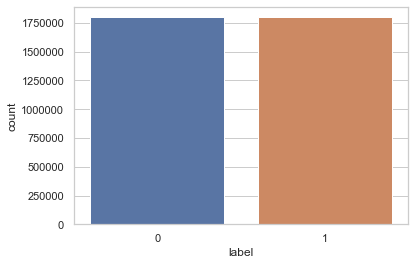

In [41]:
sns.set(style="whitegrid")
ax = sns.countplot(x="label", data=train)


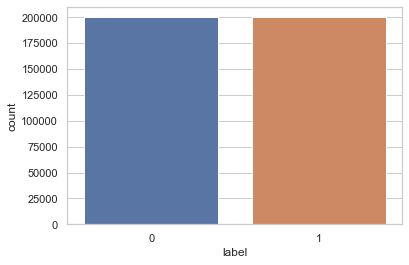

In [42]:
ax = sns.countplot(x="label", data=test)

Labels are perfectly distributed. This is a great condition for model's performence

## Word Frequency

Lets explore how the word distribution on negative and positive comments. 

In [24]:
#create a frequency list and sort them , then return most frequest n words.
wordfreq1=wordfreq(pos.comment)   
df=mostcommon(wordfreq1, 100)

In [25]:
wordfreq2=wordfreq(neg.comment)   
mostcommon(wordfreq2, 100)

,key,values
0,buy,15897
1,use,12627
2,make,12507
3,work,12266
4,good,12090
...,...,...
95,best,2856
96,tell,2839
97,fan,2789
98,long,2785


In [30]:
pos30=sorted_wordfreq(wordfreq1).iloc[:30]
neg30=sorted_wordfreq(wordfreq2).iloc[:30]

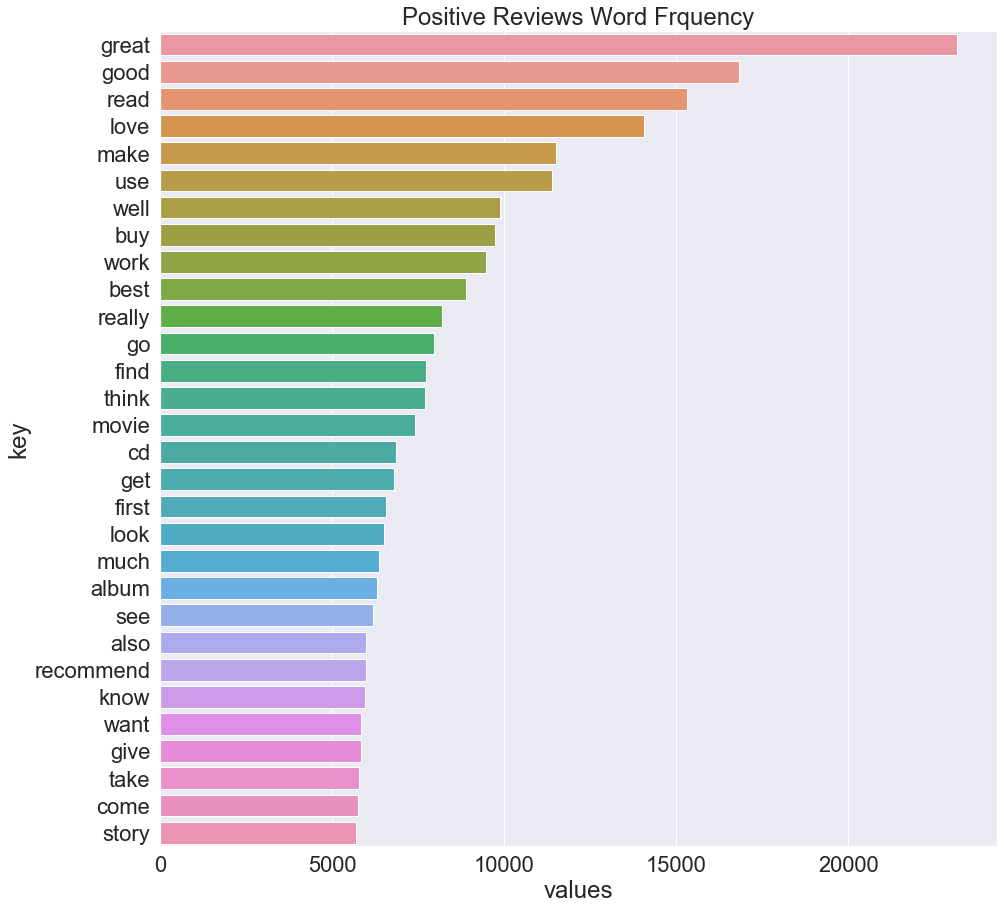

In [31]:
sns.set(font_scale=2)
plt.figure(figsize=(15,15))
plt.title('Positive Reviews Word Frquency')
sns.barplot("values","key", data=pos30)

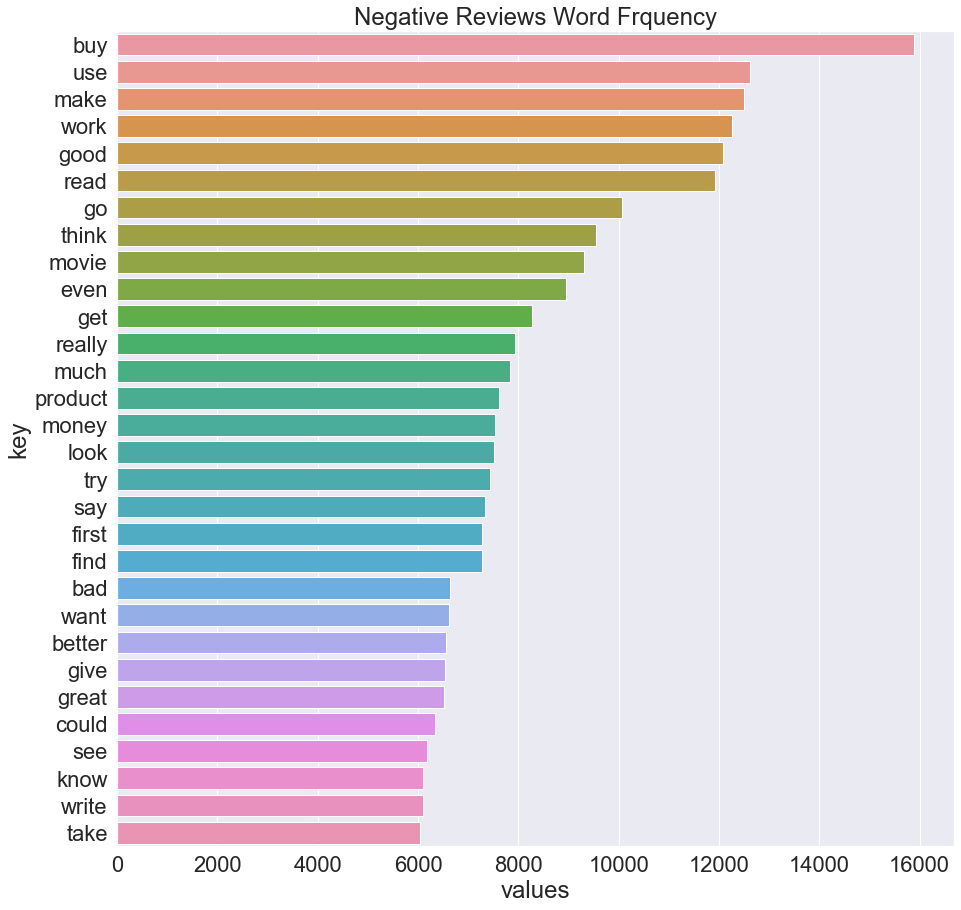

In [32]:
sns.set(font_scale=2)
plt.figure(figsize=(15,15))
plt.title('Negative Reviews Word Frquency')
sns.barplot("values","key", data=neg30)

It is hard to tell the difference between the lists when comparing the distributions. While there are some significant words for each label, many words are common and frequently used for both classes.

In [62]:
pos60=sorted_wordfreq(wordfreq1).iloc[:60]
neg60=sorted_wordfreq(wordfreq2).iloc[:60]

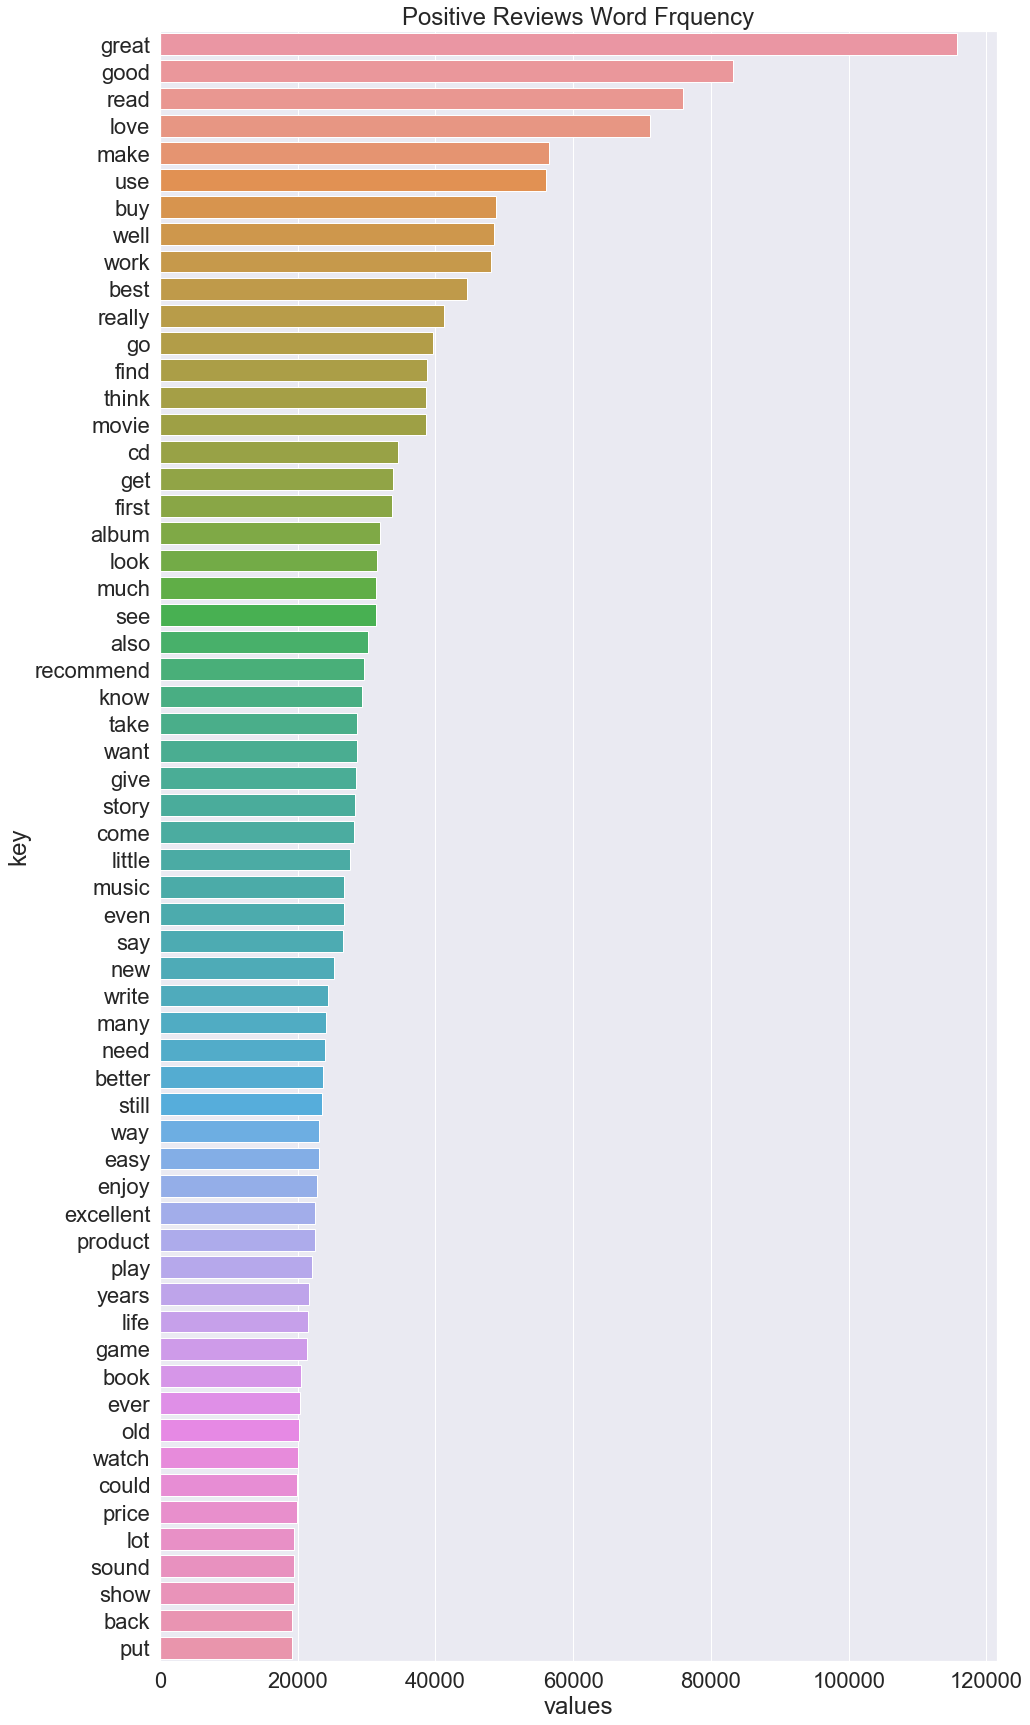

In [67]:
sns.set(font_scale=2)
plt.figure(figsize=(15,30))
plt.title('Positive Reviews Word Frquency')
sns.barplot("values","key", data=pos60)

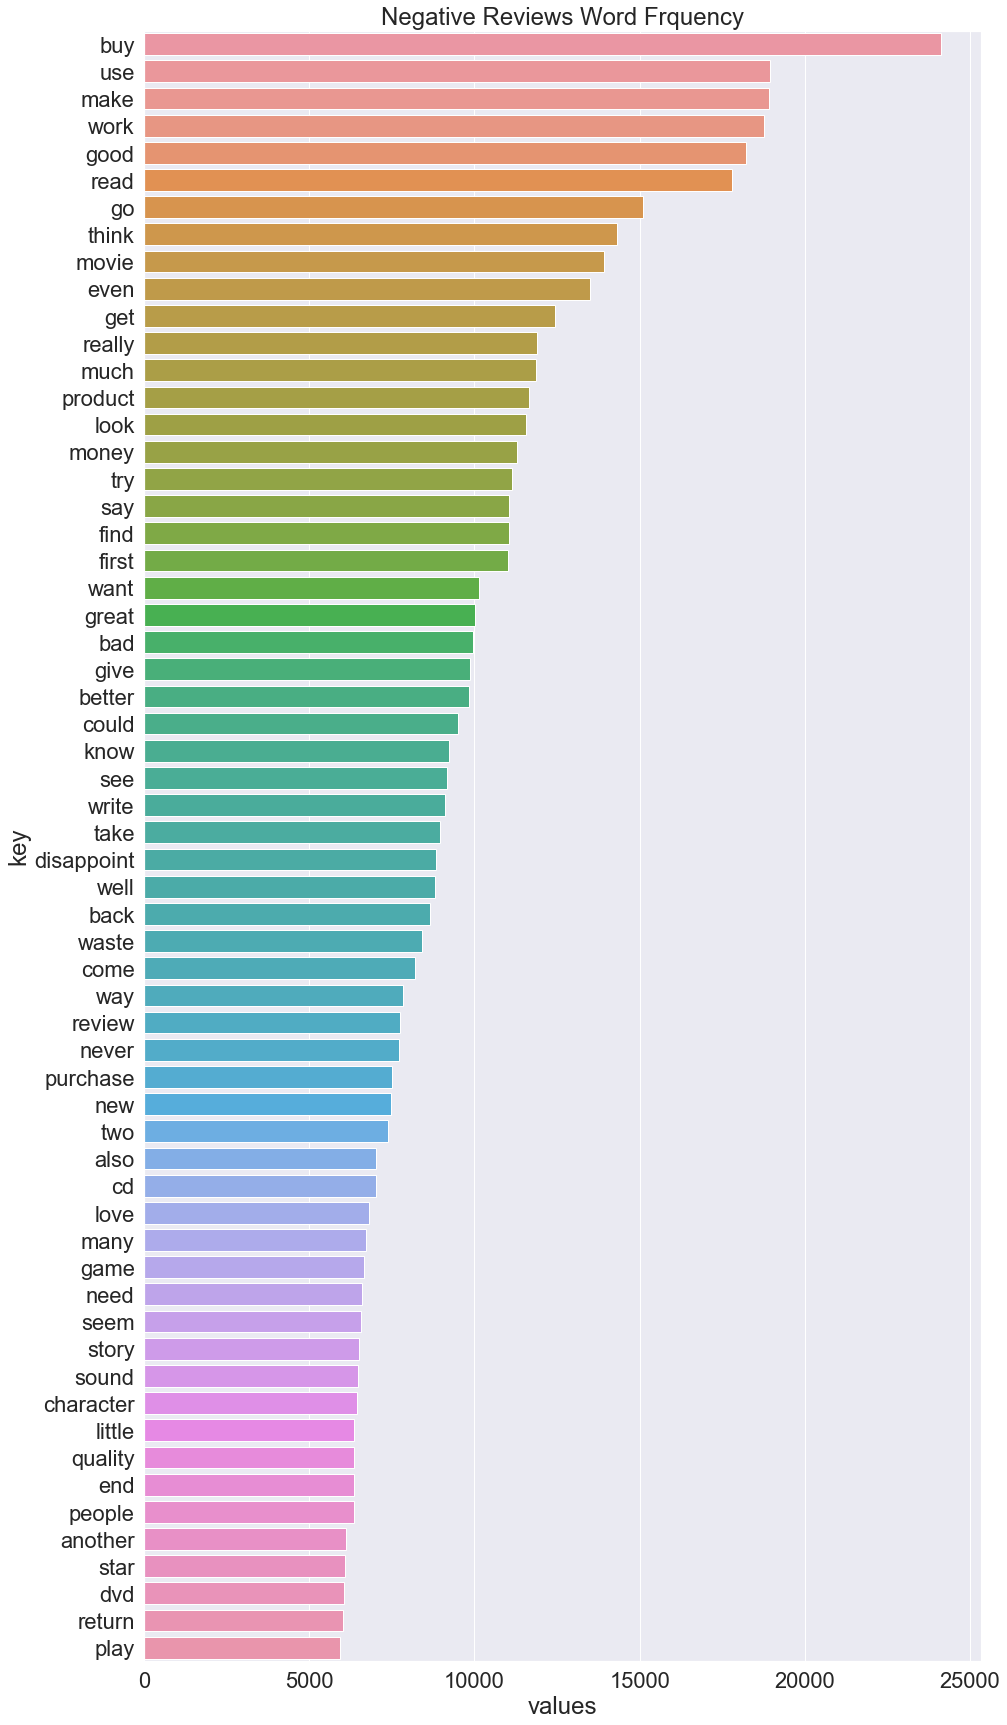

In [29]:
sns.set(font_scale=2)
plt.figure(figsize=(15,30))
plt.title('Negative Reviews Word Frquency')
sns.barplot("values","key", data=neg60)

## Comment Size Comparison

Lets check if there is any difference between the average length of comments of each label.

In [48]:
pos['length']=[len(comment.split()) for comment in pos.comment]
neg['length']=[len(comment.split()) for comment in neg.comment]

/Users/kaan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/kaan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [49]:
avg_pos=np.mean(pos['length'])
avg_neg=np.mean(neg['length'])
print([avg_pos,avg_neg])

[38.691901111111115, 40.678889444444444]


Text(0.5, 1.0, 'Comment Lenght Chart')

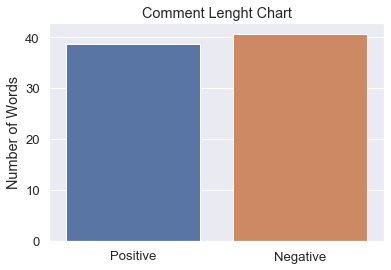

In [50]:
sns.set(font_scale=1.2)
sns.barplot(['Positive', 'Negative'], [avg_pos, avg_neg])
plt.ylabel('Number of Words')
plt.title('Comment Lenght Chart')


Negative comments are two words longer than the positive ones in average. This might not be a significant difference. 

## Create WordClouds

## Conclusion

- Amazon Product Reviews Dataset consists of total 4 millions Amazon customer reviews and their labels in two categories
- The performance of the model is related to balance in between number of comments from each category. So I check them. Labels are perfectly balanced. 
- By far The word book is the most frequent word for both groups. It is safe to say that,  Book sellers would get massive amount of reviews.So, Reading and analyzing them should be super time consuming. A model like this would help tremendously. 
- Suggestion 1: Suggestion for book sellers, an automated classifier such as this machine learning model would be very useful for them.
- I compared the comment size for each category. Suggestion 2: Customer who has negative experience tend to write longer comments. So another suggestion is longer comments might need more attention. 


## Future Works

Creating Bigrams might improve the model's performence. Bigrams are word couples that usually make more sense together such as New York.

***This is a work in progress.***

In [ ]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

In [ ]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(train)
scored = finder.score_ngrams(bigram_measures.raw_freq)
scored[:50]